In [1]:
import cv2
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt

from common.yolo import converter as converter
from common.yolo.drawer import Drawer
from common.yolo.schema_loader import SchemaLoader
from common.yolo.nms import for_pose
from common.yolo.facial_orientation import detect_facial_orientations

# モデルのロード

In [2]:
# Load the YOLOv8n-Pose model
model = YOLO("/opt/models/yolo/yolov8n-pose.pt")

# Test whether the GPU device is available
DEVICE = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'

# Move the model to the device
model.to(DEVICE)

# Drawer
schema = SchemaLoader()
drawer = Drawer(schema)

# 左右の顔の向きを検出

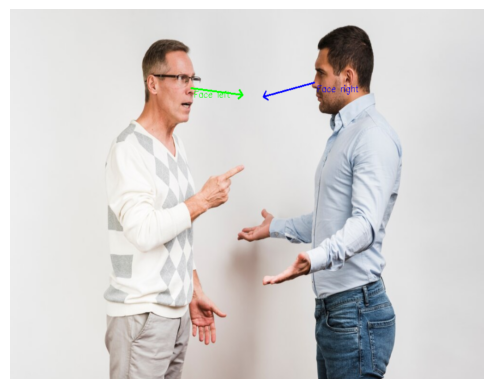

In [3]:
# Read the image
image = cv2.imread("/opt/images/arguing.png")

# Infer the image
results = model(image, verbose=False)[0]

# Process the pose
poses = converter.results_to_pose_list(results)

# Apply NMS to the poses
poses = for_pose(poses)

# Detect the facial vectors
facial_orientation, facial_vectors = detect_facial_orientations(poses, return_vectors=True, return_type="int")

# Draw the facial vectors
image = drawer.draw_facial_vectors_2d(image, facial_vectors, True, True)

# Display the frame
image = cv2.resize(image, (1024, 800))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# 正面向きを検出

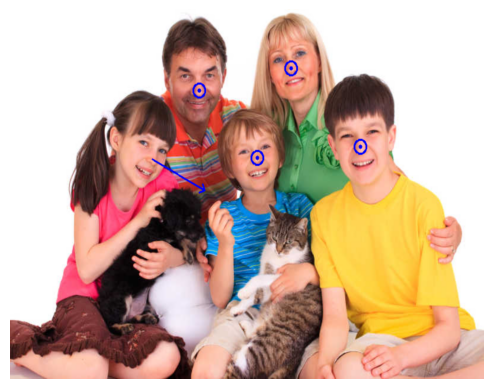

In [4]:
# Read the image
image = cv2.imread("/opt/images/human_and_pets.png")

# Infer the image
results = model(image, verbose=False)[0]

# Process the pose
poses = converter.results_to_pose_list(results)

# Apply NMS to the poses
poses = for_pose(poses)

# Detect the facial vectors
facial_orientation, facial_vectors = detect_facial_orientations(poses, return_vectors=True, return_type="int")

# Draw the facial vectors
image = drawer.draw_facial_vectors_2d(image, facial_vectors)

# Display the frame
image = cv2.resize(image, (1024, 800))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# 背面向きを検出

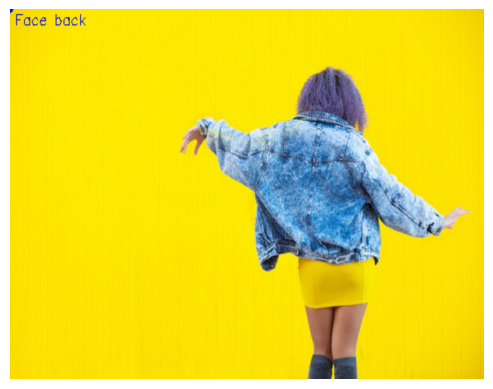

In [5]:
# Read the image
image = cv2.imread("/opt/images/turn_around.png")

# Infer the image
results = model(image, verbose=False)[0]

# Process the pose
poses = converter.results_to_pose_list(results)

# Apply NMS to the poses
poses = for_pose(poses)

# Detect the facial vectors
facial_orientation, facial_vectors = detect_facial_orientations(poses, return_vectors=True, return_type="int")

# Draw the facial vectors
image = drawer.draw_facial_vectors_2d(image, facial_vectors, show_legend=True)

# Display the frame
image = cv2.resize(image, (1024, 800))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()